# CS 595 : Adv Topics in Social Media Analysis 

# Project 1

### Ali Issaoui - A20474398

# Importing Libraries

In [7]:
import tweepy
import pickle, csv
import numpy as np

In [8]:
from IPython.display import Image

# API settings

In [9]:
API_key = "p4fZzUBrLze4MkpGCFUENBw1y"
API_secret = "slHIpQ8rCfCJ2UtJ5WEi2enVvGSP371ZS79klQKj2kNUBzlSgi"
access_token = "1240626913175121921-J36mDNEmGks0wjwizYGIQE7E1VgO3Y"
access_token_secret = "lAqKyQkacowCozyQ9iLXB5tKiN51liOV8u8R3jmGIIZFj"

In the next cell, we will initalize the twitter API using the 4 keys. The wait_on_rate_limit indicates that the program sleeps when the number of requests allowed per minute is reached, and starts again when possible.

In [10]:
# Authentification and creating api
auth = tweepy.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# User

In [11]:
user = api.get_user(screen_name = 'AliISSAOUI12')

### Getting 200 friends with cursor

In [11]:
my_friends = []
for friend in tweepy.Cursor(api.friends, user.screen_name).items(200):
    my_friends.append(friend.screen_name)


## Creating set of friends ( for optimization purposes )

In [12]:
my_friends = set(api.friends_ids(user.screen_name))

### Friends of friends

In [13]:
connections = {user.id: my_friends}

### Time consumption

This part of the code took about 3 hours 30 min, since twitter only allows us to do 15 request per 15 mins. So in order to get the friends of my 200 friends, it took me about 3 hours 30 min.

In [14]:
# 1 indicates that the connnections are already saved in the file "connections.p"
presaved = 1

In [15]:
if not presaved:
    for friend in my_friends:
        print(friend)
        # Linar complexity on intersection https://wiki.python.org/moin/TimeComplexity
        connections[friend] = my_friends.intersection(set(api.friends_ids(friend)))
    
else:
    with open('../data/connections.p', 'rb') as fp:
        connections = pickle.load(fp)

The graph represented as an adjacency list

In [16]:
connections

{783214: set(),
 807095: set(),
 813286: {409486555, 1330457336},
 5536782: set(),
 5988062: set(),
 8453452: {409486555},
 13298072: {44196397},
 14872237: {783214},
 16548023: set(),
 18839785: {783214, 813286, 5988062, 50393960, 1976143068, 3131144855},
 19017675: {3131144855},
 19397785: {23151437},
 23151437: {813286, 19397785, 155659213, 409486555},
 24744541: {759251, 807095},
 25049177: {52032722, 1976143068},
 29442313: {759251, 807095, 813286, 5988062, 1330457336, 1339835893},
 41360559: {759251, 19397785, 50393960, 109556877, 748291920, 2683723274},
 44196397: {13298072},
 50393960: {807095,
  813286,
  5988062,
  18839785,
  1330457336,
  1339835893,
  1976143068},
 51205035: {44196397,
  109556877,
  166385520,
  458282225,
  521737085,
  741926885827981312,
  1214957621024825344,
  1217412369095282688},
 52032722: {759251, 5536782, 25049177},
 66591836: {759251, 783214},
 71783170: {44196397, 1227732466963828736},
 78681704: {390869031, 1252301904, 1976143068, 2683723274}

In [17]:
# A dictionary linking each id to the list of friends' ids
for key in connections:
    try:
        print("The user:", api.get_user(key).screen_name, "has",len(connections[key]), "friends in common with me.")
    
    # If the user for example deleted their account
    except Exception:
        pass


The user  AliISSAOUI12 has 203 friends in common with me.
The user  destinachild has 14 friends in common with me.
The user  toujourspasm0i has 7 friends in common with me.
The user  cravedcuddle has 0 friends in common with me.
The user  hichamlarchi1 has 2 friends in common with me.
The user  elallam_hiba has 6 friends in common with me.
The user  iitesports has 1 friends in common with me.
The user  deafvenus has 21 friends in common with me.
The user  eyopapiii has 13 friends in common with me.
The user  Toxic_zzzzz has 0 friends in common with me.
The user  1chaimae1 has 18 friends in common with me.
The user  AedesiaZ has 49 friends in common with me.
The user  taeyaya4 has 62 friends in common with me.
The user  dametlbena has 28 friends in common with me.
The user  aitmarwa1 has 30 friends in common with me.
The user  Hobo_WorId has 62 friends in common with me.
The user  b_wime has 8 friends in common with me.
The user  opiumalak has 46 friends in common with me.
The user  kni

The user  imadbt_ has 12 friends in common with me.
The user  queenvamp__ has 52 friends in common with me.
The user  Imanojito has 81 friends in common with me.
The user  BillGates has 7 friends in common with me.
The user  Twitter has 0 friends in common with me.
The user  freaky_mahdi has 119 friends in common with me.
The user  internethiba has 37 friends in common with me.
The user  yeezusmyjeezus has 97 friends in common with me.
The user  WMa7a has 14 friends in common with me.
The user  OuahidChaimaa has 25 friends in common with me.
The user  samiaoof has 20 friends in common with me.
The user  urfavpilouchh has 12 friends in common with me.
The user  A_rndm has 47 friends in common with me.
The user  chaker_sohaib has 2 friends in common with me.
The user  aliaeltaher2 has 0 friends in common with me.
The user  emeIIyy has 0 friends in common with me.
The user  Oumeehmas has 33 friends in common with me.
The user  TheAgnosticN has 2 friends in common with me.
The user  mahyam

# Save the connections

If not presaved

In [18]:
if not presaved :
    with open('connections.p', 'wb') as fp:
        pickle.dump(connections, fp, protocol=pickle.HIGHEST_PROTOCOL)


In [19]:
connections

{783214: set(),
 807095: set(),
 813286: {409486555, 1330457336},
 5536782: set(),
 5988062: set(),
 8453452: {409486555},
 13298072: {44196397},
 14872237: {783214},
 16548023: set(),
 18839785: {783214, 813286, 5988062, 50393960, 1976143068, 3131144855},
 19017675: {3131144855},
 19397785: {23151437},
 23151437: {813286, 19397785, 155659213, 409486555},
 24744541: {759251, 807095},
 25049177: {52032722, 1976143068},
 29442313: {759251, 807095, 813286, 5988062, 1330457336, 1339835893},
 41360559: {759251, 19397785, 50393960, 109556877, 748291920, 2683723274},
 44196397: {13298072},
 50393960: {807095,
  813286,
  5988062,
  18839785,
  1330457336,
  1339835893,
  1976143068},
 51205035: {44196397,
  109556877,
  166385520,
  458282225,
  521737085,
  741926885827981312,
  1214957621024825344,
  1217412369095282688},
 52032722: {759251, 5536782, 25049177},
 66591836: {759251, 783214},
 71783170: {44196397, 1227732466963828736},
 78681704: {390869031, 1252301904, 1976143068, 2683723274}

# Graph

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
graph=nx.DiGraph()

In [22]:
for person in connections.keys():
    for friend in connections[person]:
        graph.add_edge(person, friend)

/Users/aliissaoui/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/aliissaoui/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


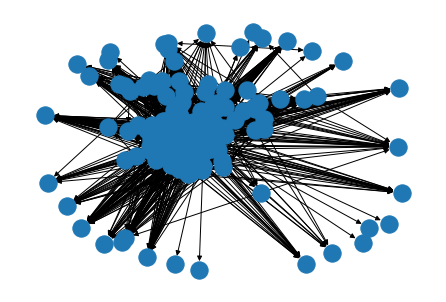

In [23]:
nx.draw(graph)
plt.show()

## Using Gephi

Creating the CSV format of the data if not already created.

In [24]:
if not presaved:
    # Create the graph file as list of edges.
    file = []
    for person in connections.keys():
        for friend in connections[person]:
            file.append([person,friend])


    # Saving the file in csv format        
    with open('../data/connections.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile) 
        csvwriter.writerows(file)

Using the ForceAtlas algorithm for Handy Network Visualization

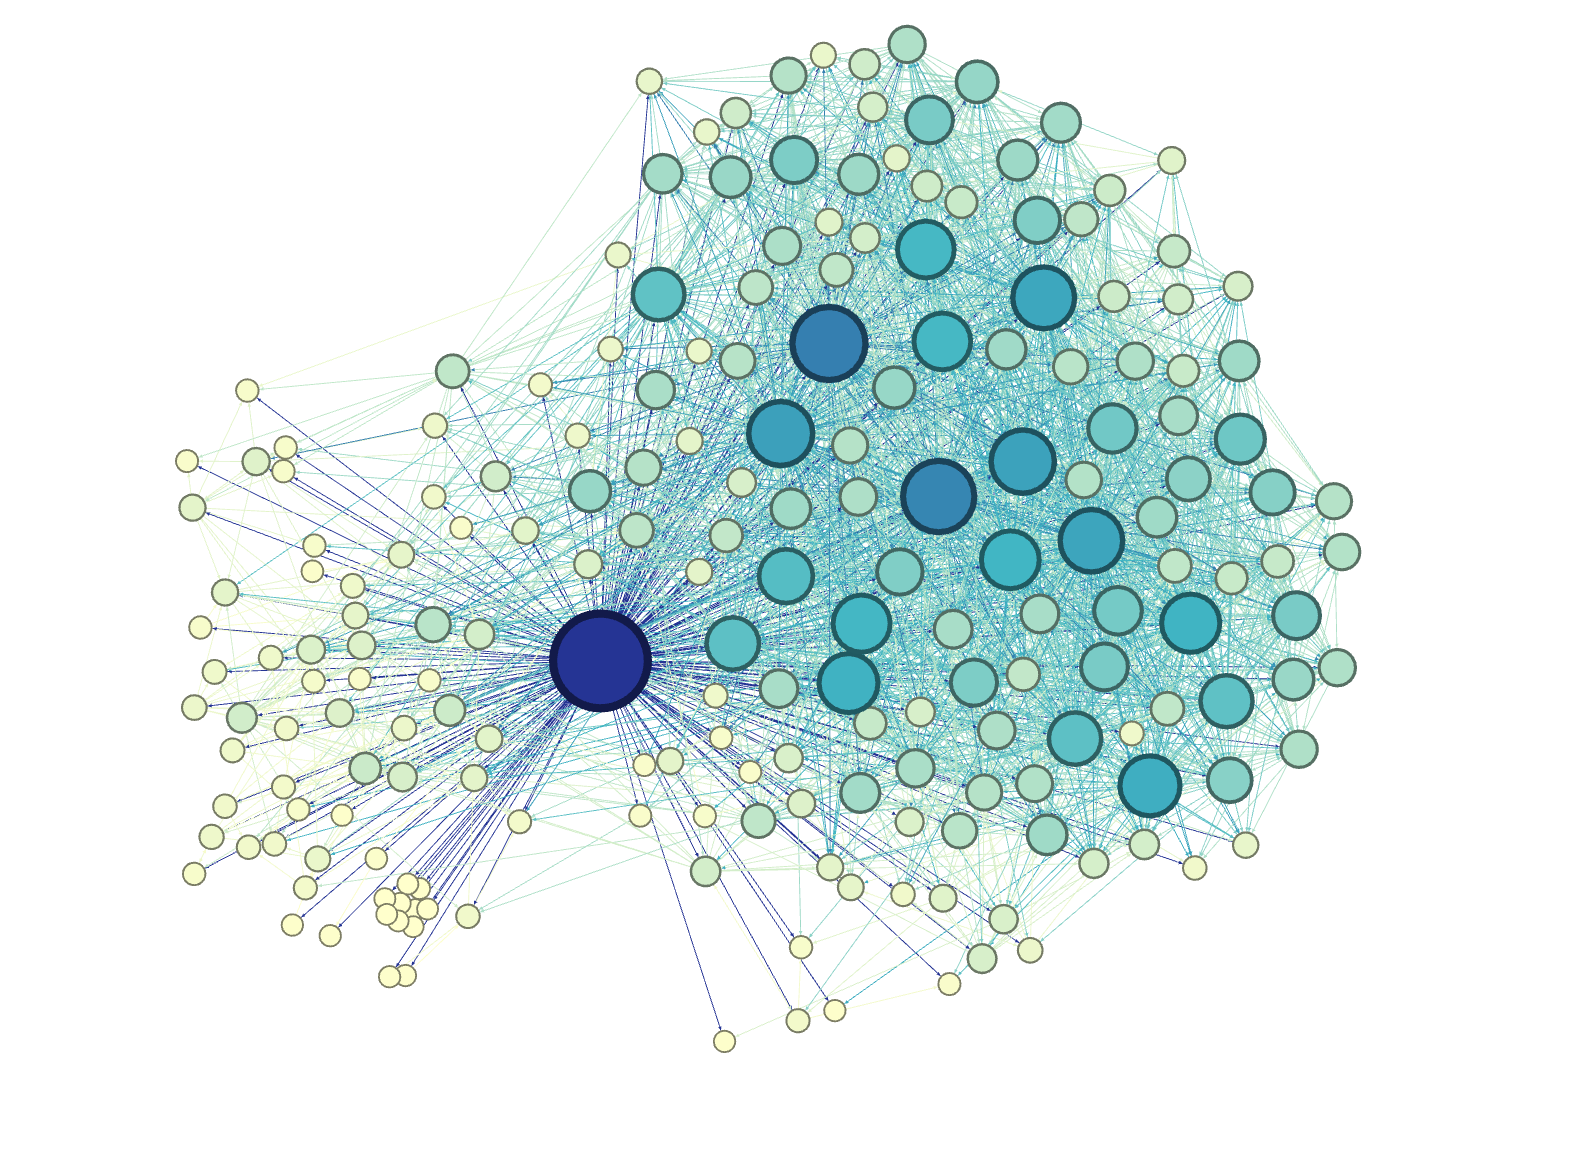

In [25]:
Image("../images/graph1.png", width=700, height=700)

Using the ForceAtlas 2 algorithm for Handy Network Visualization

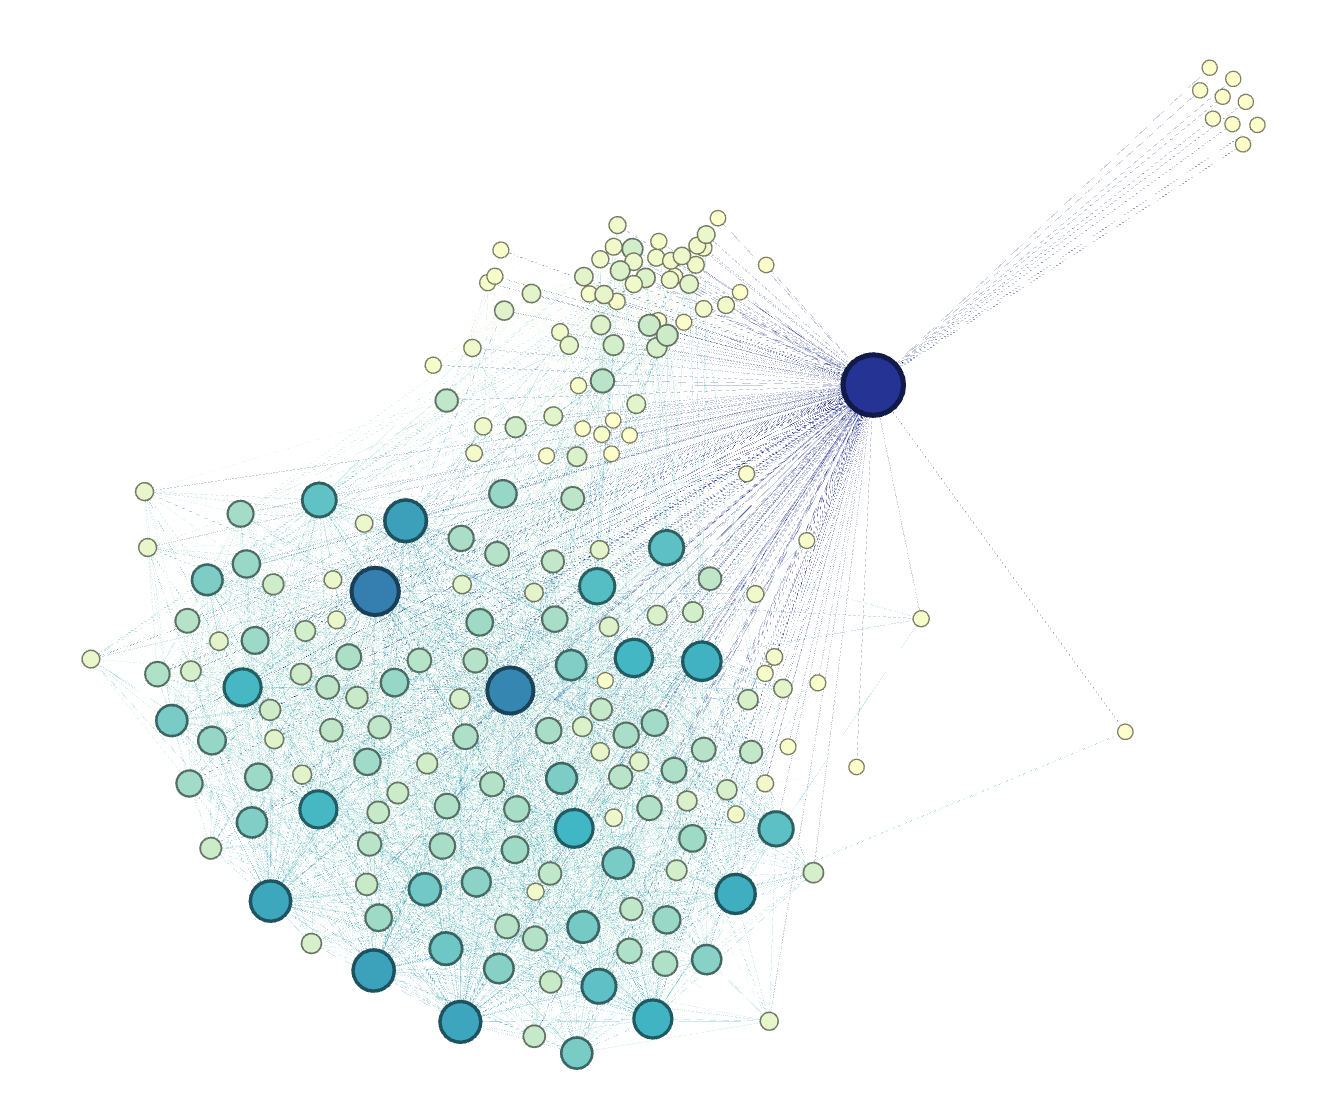

In [26]:
Image("../images/graph3.png", width=700, height=700)

Using the Fruchterman reingold layout

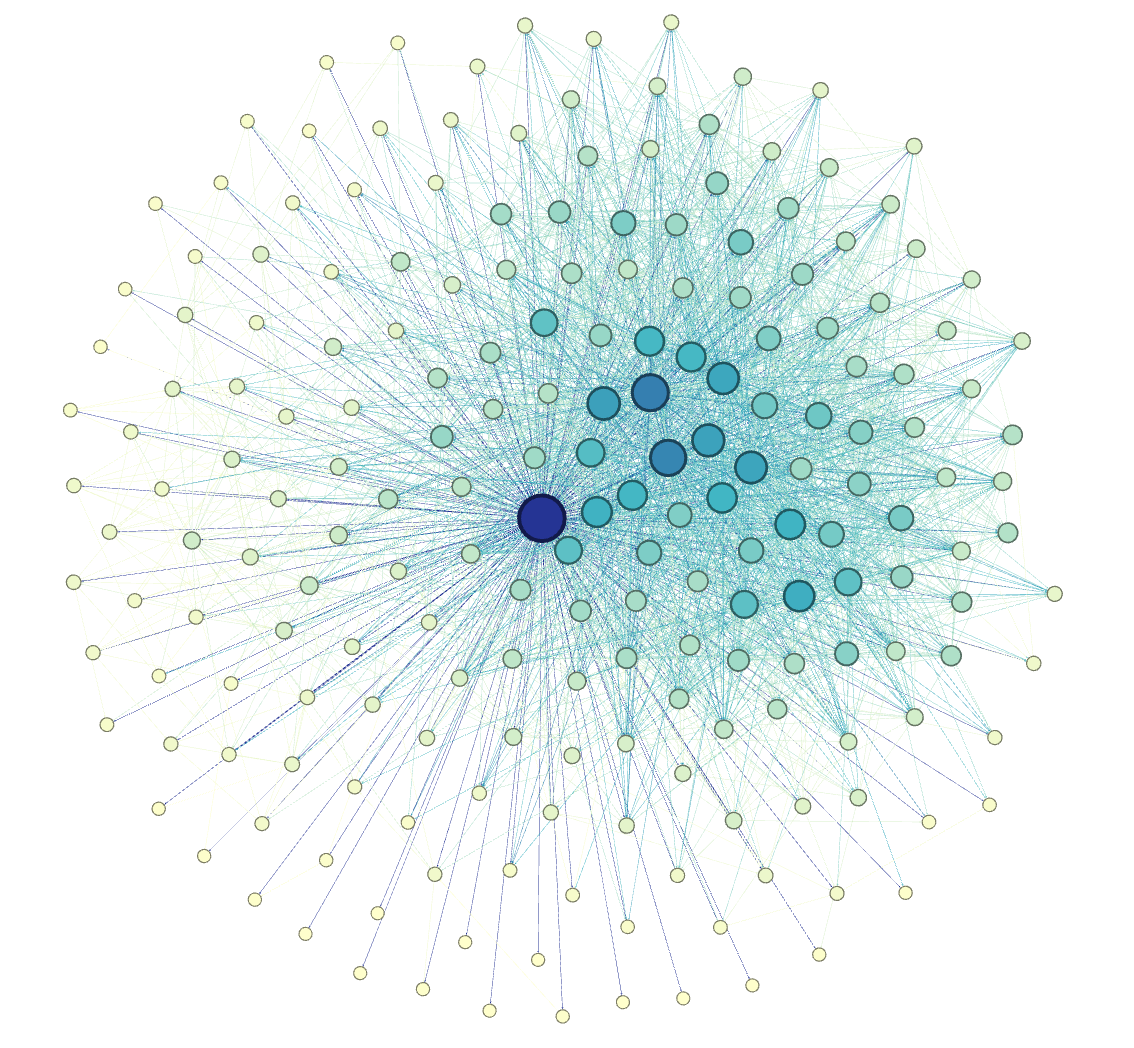

In [43]:
Image("../images/graph2.png", width=700, height=700)

# Network measures

### Number of nodes

In [27]:
print("The number of nodes of the graph:", len(graph))

The number of nodes of the graph: 204


In [28]:
print("The number edges of the graph:", graph.number_of_edges())

The number edges of the graph: 4919


## Degree Distribution

In [68]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms.distance_measures import diameter
from networkx.algorithms.centrality import degree_centrality, closeness_centrality, betweenness_centrality

Creating the dictionnary with each friend and the number of friends we have in commons from the graph.

In [54]:
degrees = [graph.degree(n) for n in graph.nodes()]
degrees = sorted(degrees)

connection_counts = {}
for d in degrees:
    if d in connection_counts.keys():
        connection_counts[d] += 1
    else:
        connection_counts[d] = 1

In [55]:
connection_counts

{1: 7,
 2: 5,
 3: 3,
 4: 2,
 5: 1,
 6: 3,
 7: 5,
 8: 4,
 9: 4,
 10: 3,
 11: 4,
 12: 1,
 13: 4,
 14: 1,
 15: 4,
 16: 3,
 17: 4,
 18: 4,
 19: 3,
 20: 4,
 21: 5,
 22: 1,
 23: 4,
 24: 2,
 25: 3,
 26: 3,
 27: 1,
 28: 5,
 29: 1,
 30: 1,
 31: 1,
 33: 1,
 35: 2,
 36: 3,
 38: 2,
 40: 1,
 41: 1,
 43: 1,
 44: 3,
 45: 1,
 46: 2,
 47: 4,
 48: 6,
 49: 1,
 50: 1,
 51: 3,
 52: 3,
 53: 2,
 54: 2,
 57: 2,
 58: 3,
 59: 2,
 60: 2,
 62: 1,
 63: 1,
 65: 2,
 66: 2,
 67: 1,
 68: 2,
 69: 1,
 70: 1,
 73: 1,
 74: 1,
 75: 1,
 77: 1,
 78: 1,
 80: 2,
 82: 1,
 86: 2,
 88: 2,
 89: 2,
 91: 1,
 93: 2,
 96: 1,
 99: 1,
 100: 1,
 101: 3,
 102: 1,
 103: 2,
 104: 1,
 105: 1,
 111: 1,
 114: 1,
 115: 2,
 117: 1,
 119: 1,
 120: 1,
 122: 1,
 123: 1,
 126: 1,
 131: 1,
 135: 1,
 137: 1,
 140: 1,
 141: 1,
 155: 1,
 159: 1,
 160: 1,
 170: 1,
 181: 1,
 203: 1}

In [77]:
def plot_degree_dist(counts):
    lists = sorted(counts.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) 
    
    plt.figure(figsize=(10,10))
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.bar(x, y)
    plt.show()

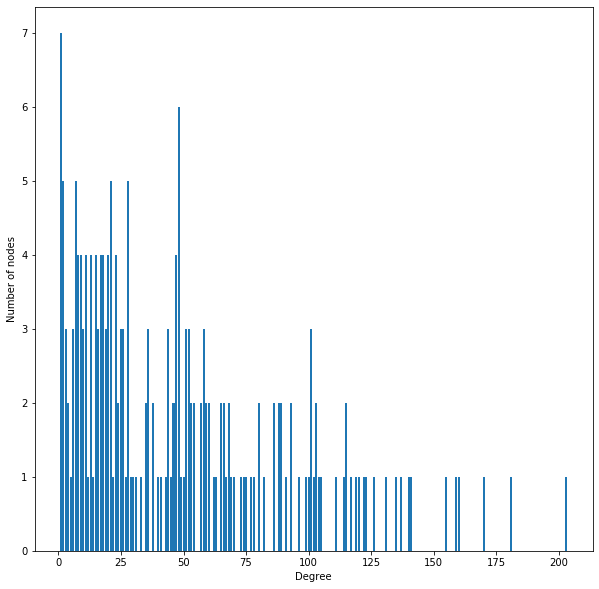

In [78]:
plot_degree_dist(connection_counts)


## Plotting functions for the next metrics:

In [33]:
def plot_metric(metric, xlabel, ylabel):
    plt.figure(figsize=(10,10))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.bar(range(len(metric)), list(metric.values()), align='center')
    plt.xticks(range(len(metric)), list(metric.keys()))

    plt.show()

## Clustering Coefficient

In [34]:
clusters = nx.clustering(graph)

# Sort the dictionnary based on clustering coefficient
clusters = dict(sorted(clusters.items(), key=lambda item: item[1]))

### Plotting the clustering coefficient

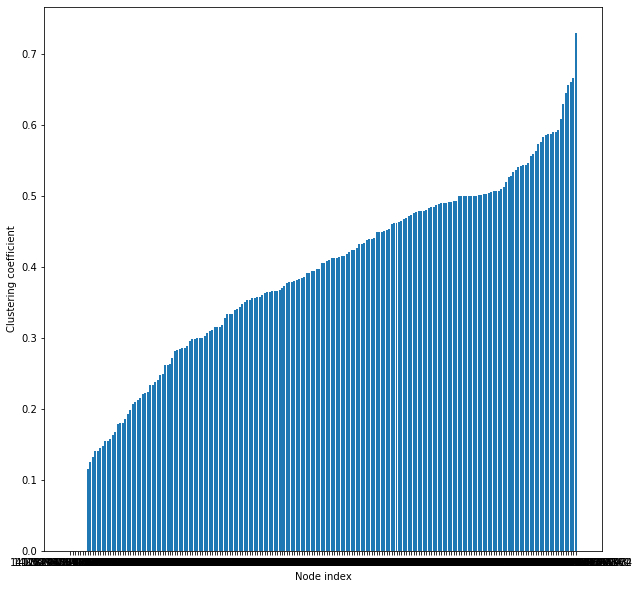

In [35]:
plot_metric(clusters, "Node index", "Clustering coefficient")

## Page Rank

In [36]:
pg = pagerank(graph)

# Sort the dictionnary based on page rank
pg = dict(sorted(pg.items(), key=lambda item: item[1]))

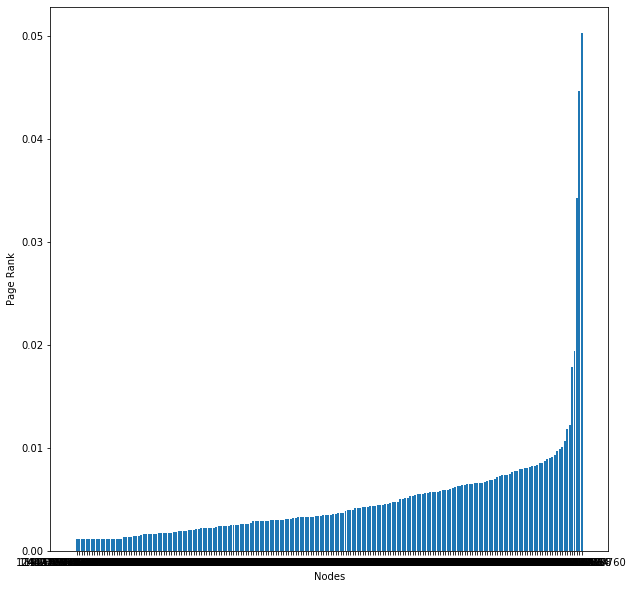

In [37]:
plot_metric(pg, "Nodes", "Page Rank")

## Centralities

### Degree Centrality

In [38]:
deg_centrality = degree_centrality(graph)

# Sort the dictionnary based on clustering coefficient
deg_centrality = dict(sorted(deg_centrality.items(), key=lambda item: item[1]))

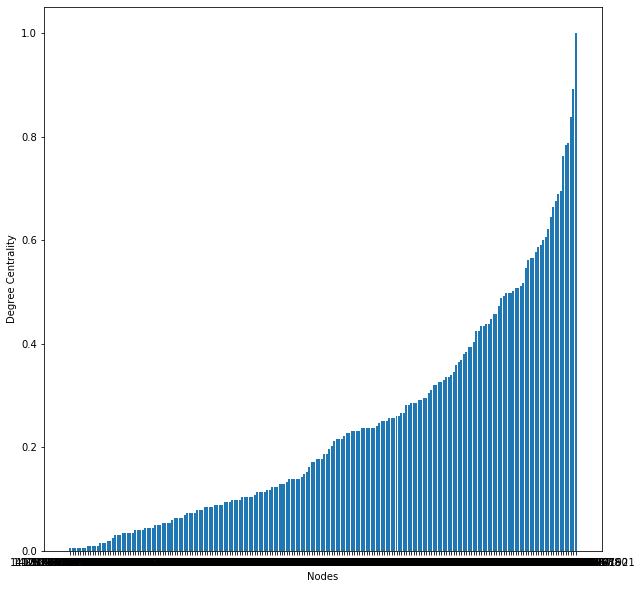

In [39]:
plot_metric(deg_centrality, "Nodes", "Degree Centrality")

### Closeness

In [40]:
clos_centrality = closeness_centrality(graph)

# Sort the dictionnary based on clustering coefficient
clos_centrality = dict(sorted(clos_centrality.items(), key=lambda item: item[1]))

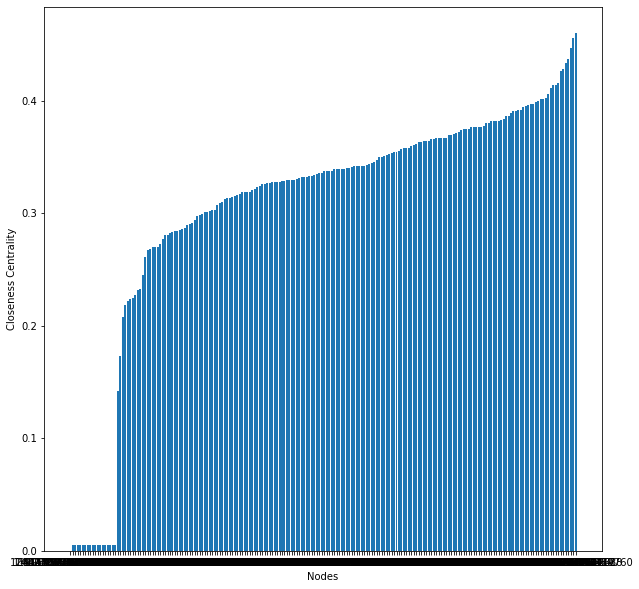

In [41]:
plot_metric(clos_centrality, "Nodes", "Closeness Centrality")

### Betweenness

In [42]:
bet_centrality = betweenness_centrality(graph)

# Sort the dictionnary based on clustering coefficient
bet_centrality = dict(sorted(bet_centrality.items(), key=lambda item: item[1]))

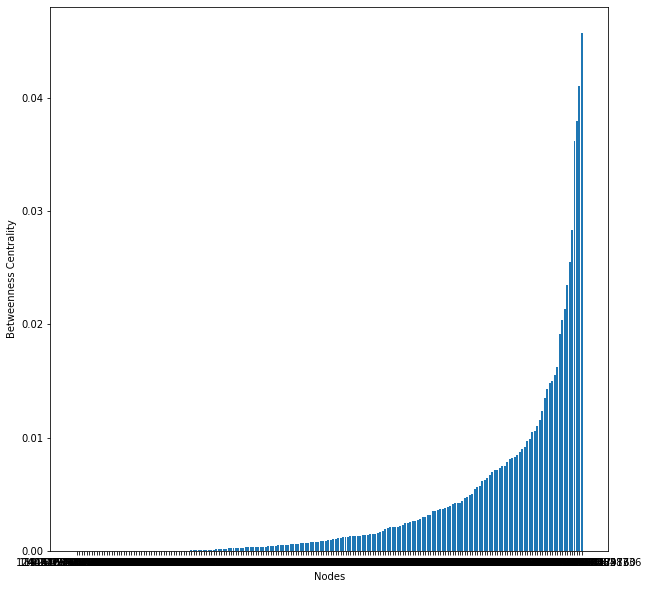

In [43]:
plot_metric(bet_centrality, "Nodes", "Betweenness Centrality")